In [540]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.expand_frame_repr=True
pd.options.display.width = 80
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 100

In [541]:
writer = pd.ExcelWriter('./output.xlsx')
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1GySCud5wSEqG6ydskdMCPZJfpYjve_Yo4mdH1TzBY_g/gviz/tq?tqx=out:csv")

In [542]:
df.drop_duplicates(inplace=True)
df.applymap(lambda x: x.strip() if type(x) is str else x)
df.rename(index=str, columns={"What is your gender?": "gender",
                              "What is your age range?": "age",
                              'What is your highest level of education?':'education',
                              'What is your ethnicity?':'ethnicity',
                              'What is your sexual orientation?':'sexual orientation',
                              'Where are you located?':'location',
                              'Where in the United States?':'us location',
                              'What is your relationship status?':'relationship status',
                              'How long have you been a redditor?':'years on reddit',
                              'Do you use more than one account on /r/nba? ':'multiple accounts',
                              'Do you have a local NBA Team?':'local NBA team',
                              'What\'s your favorite sport?':'favorite sport',
                              'How many NBA games have you attended?':'games attended',
                              'Are you or have you ever been an NBA season ticket holder?':'season tickets',
                              'How long have you regularly watched the NBA?':'years watched NBA',
                              'What\'s the highest level of basketball you\'ve played?':'highest level of basketball',
                             'What\'s your MOST favorite NBA Team?':'most favorite team',
                             'What\'s your LEAST favorite NBA Team?':'least favorite team',
                             'Who\'s your favorite NBA player':'favorite NBA player',
                             'Outside of /r/nba, where do you get your NBA news from most often?':'other social media',
                             'Social Media of Choice?':'social media of choice',
                             'Any comments/suggestions?':'comments'},inplace=True)
df.describe()

Timestamp gender    age          education ethnicity  \
count                18407  18407  18407              18407     18407   
unique               17588    121      9                  9       160   
top     6/26/2018 12:59:04   Male  22-25  Bachelor’s degree     White   
freq                     3  17593   5424               7259     11150   

       sexual orientation location us location relationship status  \
count               18407    18408       12788               18407   
unique                136      140          50                   5   
top              Straight      USA  California              Single   
freq                17394    13198        2605               10271   

       years on reddit multiple accounts local NBA team favorite sport  \
count            18407             18407          18407          18406   
unique              10                 2              2            293   
top        3 - 4 years                No            Yes     Basketball   
freq              5783             17513          10906          13079   

       games attended season tickets years watched NBA  \
count           18407          18407             18407   
unique              7              2                 8   
top              None             No      5 - 10 years   
freq             5729          17752              4381   

       highest level of basketball most favorite team    least favorite team  \
count                        18407              17725                  16935   
unique                         119                 30                     30   
top              Pick-up/Rec games          LA Lakers  Golden State Warriors   
freq                          6844               1677                   5289   

       favorite NBA player other social media social media of choice comments  
count                16304              18373                  18357     2101  
unique                2037               1025                    424     1812  
top           LeBron James            Twitter              Instagram       No  
freq                  1303               7255                   5121       29

# Gender Groupings

### Include only reasonable responses

In [543]:
df = df[df['gender'].isin([
    'Male', 'Female', 'Prefer not to say', 'Non binary', 'Non-binary', 'Non-Binary','Transexual',
    'Human','Transgender','Gender fluid',
    'Genderfluid','genderfluid','Nonbinary','NonBinary', 'Trans Woman'])]
df = df[df['sexual orientation'].isin([
    'Straight', 'Bisexual', 'Gay', 'Pansexual','Asexual', 'Queer', 'lesbian','Q',
    'Straight but I say gay stuff on r/NBA for the memes', 'Asexual ','idk', 'Asexual/Aromantic', 'Idk lol',
    'It\'s confusing','Prefer not to say.', 'Confused','Pan/Queer',
    'Lesbian ','Hyperpansexual','polyamorous', 'Unsure',
    'pansexual','Lol idk', 'Nonbinary', 'queer', 'None ','Biromantic asexual','Non','Transexual',
    'Extra Straight','Not sure'])]
df = df[~df['ethnicity'].isin(['Nephew','Bull','D','Helicopter','Bitch I\'m from mars','Creamy White','what if I\'m mexican and white?', 'Noneurbusiness', 'Kobestanian','Male','Space','Trans-Black'])]
df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0                Male   17539
1              Female     498
2   Prefer not to say      87
3          Non-Binary       3
4          Non binary       3
5           Nonbinary       2
6          Non-binary       2
7         Genderfluid       2
8           NonBinary       1
9         Trans Woman       1
10        Transgender       1
11              Human       1
12         Transexual       1
13       Gender fluid       1
14        genderfluid       1

### Fix typos/alternate spellings

In [544]:
gender['gender'].replace(["Non binary",'Non-binary','Non-Binary','NonBinary'],'Non-Binary',True)
gender['gender'].replace('genderfluid','Genderfluid',True)
gender['gender'].replace(['Trans Woman','Transexual'],'Transgender',True)

### Gender Counts (Cleaned)

In [545]:
gender['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0               Male   16765
1             Female     467
2  Prefer not to say      79
3         Non-Binary       9
4        Transgender       3
5        Genderfluid       2

### Gender Plot (Cleaned)

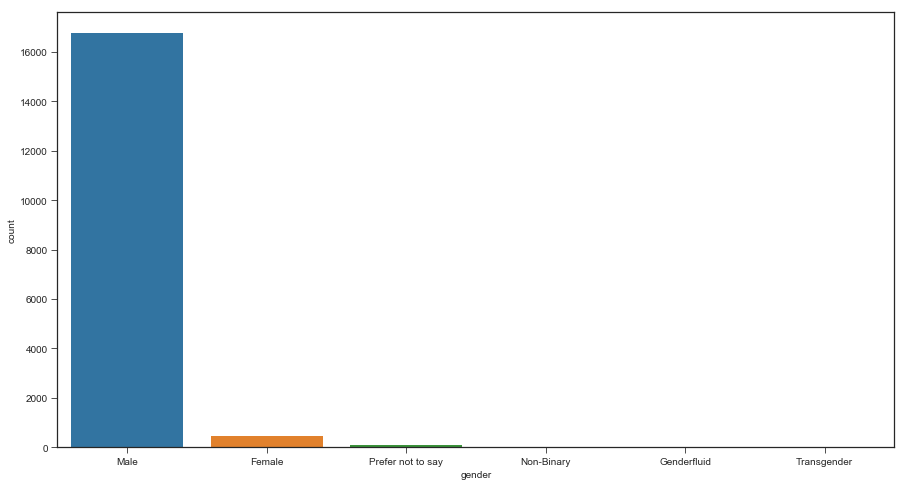

In [546]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sns.countplot(gender['gender']);

### Gender Percentiles (Cleaned)

In [547]:
gender['gender'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')

unique_values    counts
0               Male  0.967677
1             Female  0.026955
2  Prefer not to say  0.004560
3         Non-Binary  0.000519
4        Transgender  0.000173
5        Genderfluid  0.000115

# Age Groupings

In [548]:
df['age'].value_counts().rename_axis('unique_values').reset_index(name='counts').sort_values(by=['unique_values'])

unique_values  counts
4  17 and Under    1149
1         18-21    4944
0         22-25    5358
2         26-30    4222
3         31-35    1665
5         36-40     552
6         41-50     188
8         51-60      24
7       Over 60      41

### Age Plot

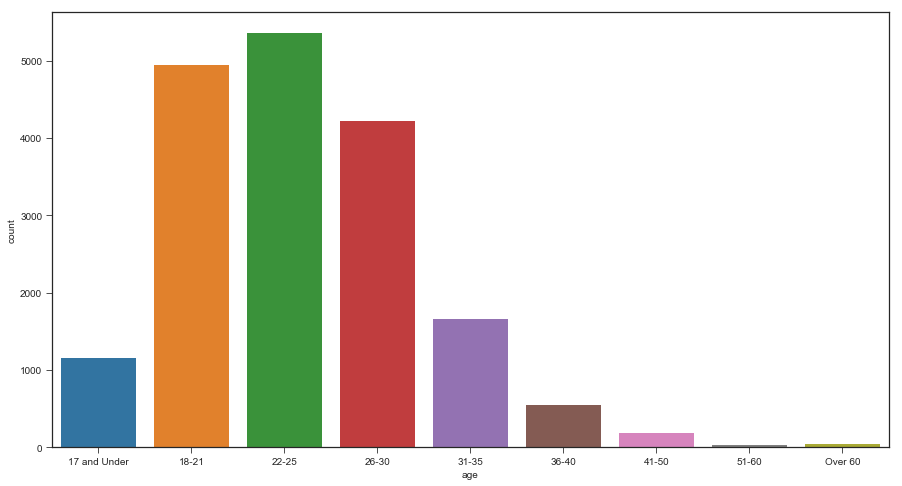

In [549]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sns.countplot(df['age'].sort_values())

### Age Percentiles

In [550]:
df['age'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')

unique_values    counts
0         22-25  0.295321
1         18-21  0.272502
2         26-30  0.232707
3         31-35  0.091771
4  17 and Under  0.063330
5         36-40  0.030425
6         41-50  0.010362
7       Over 60  0.002260
8         51-60  0.001323

# Education

In [551]:
df['education'].replace(
    "High school graduate, diploma or the equivalent (for example: GED)", "High School Graduate",True)
df['education'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                    Bachelor’s degree    7191
1       Some college credit, no degree    4508
2                      Master’s degree    1742
3                 High School Graduate    1680
4         Some high school, no diploma    1194
5                     Associate degree     659
6                     Doctorate degree     556
7                  Professional degree     347
8  Trade/technical/vocational training     266

### Education Plot

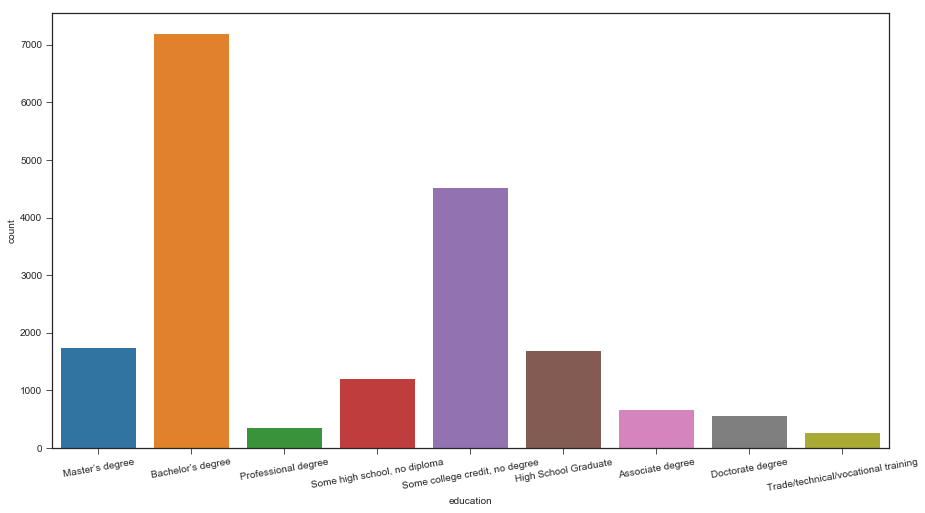

In [552]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
g=sns.countplot(df['education'])
_ = g.set_xticklabels(ax.get_xticklabels(),rotation=10)

# Ethnicity

In [553]:
ecounts = df['ethnicity'].value_counts()
ecounts[ecounts > 1].rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                   White   11045
1                   Asian    2384
2   Indian or South Asian    1204
3                Hispanic    1069
4                   Mixed     946
5                   Black     862
6          Middle Eastern     322
7        Pacific Islander     109
8         Native American      64
9                  Jewish      10
10          North African       5
11       South East Asian       5
12        Southeast Asian       4
13               Armenian       4
14                  Maori       4
15               European       3
16              Brazilian       3
17          Mediterranean       2
18                Turkish       2
19               Filipino       2
20                  Greek       2
21              Pakistani       2
22          north african       2
23               Guyanese       2
24               American       2
25         Latin American       2

### Ethnicity Plot

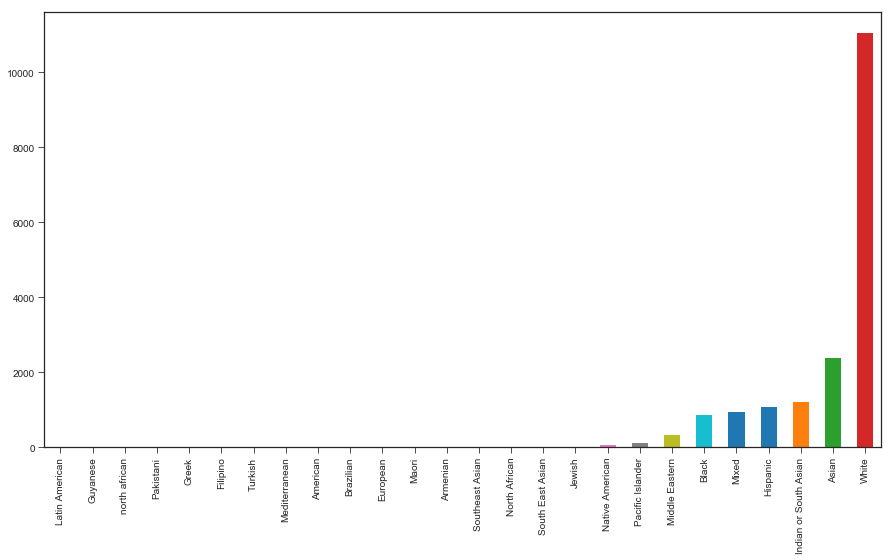

In [554]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = ecounts[ecounts > 1].sort_values().plot(kind="bar");

# Sexual Orientation

In [555]:
df['sexual orientation'].replace([
    'idk', 'Idk lol', 'It\'s confusing','Confused','Lol idk', 'Unsure', 'Not sure'],'unsure',True)
df['sexual orientation'].replace(['Pan/Queer','Q', 'Hyperpansexual','queer', 'pansexual'],'Pansexual',True)
df['sexual orientation'].replace([
    'Extra Straight','Straight but I say gay stuff on r/NBA for the memes',
    'Like 95% straight but I’d probably fuck Kevin Love'],'Straight',True)
df['sexual orientation'].replace(['Asexual/Aromantic','Asexual '],'Asexual',True)
df['sexual orientation'].replace(['Non','None'],'Asexual',True)
df['sexual orientation'].replace(['lesbian','Lesbian '],'Lesbian',True)

### Removing data with response frequency of 1

In [580]:
sxorcounts = df['sexual orientation'].value_counts()
sxorcounts.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             Straight   17292
1             Bisexual     634
2                  Gay     148
3            Pansexual      31
4              Asexual      16
5               unsure       8
6                Queer       5
7              Lesbian       3
8            Nonbinary       1
9                None        1
10  Biromantic asexual       1
11         polyamorous       1
12          Transexual       1
13  Prefer not to say.       1

### Sexual Orientation Plot (Cleaned)

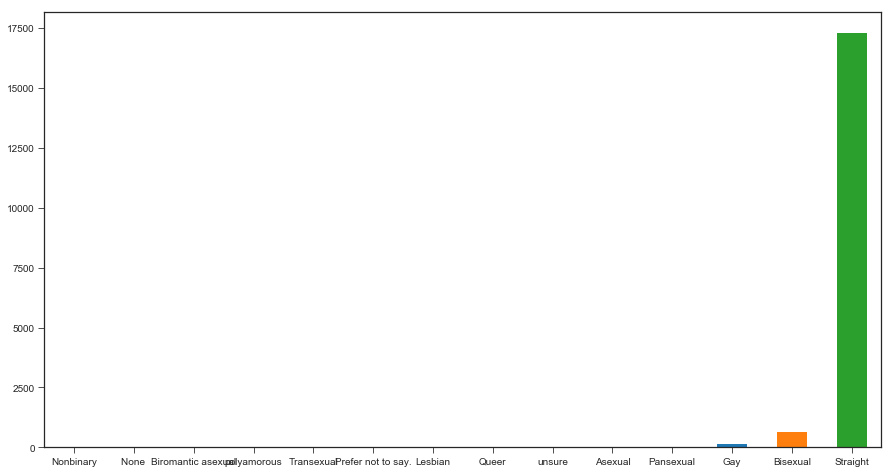

In [617]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = sxorcounts.sort_values().plot(kind="bar",rot=0)

# General Location

In [618]:
df =df[df['location']!='Nephew']
df['location'].replace(['Singapore, how the fuck is India or South Asia a choice? ','singapore','singapore '],'Singapore',True)
df['location'].replace('BC, Canada','Canada',True)
df['location'].replace(['Viet Nam'],'Vietnam',True)
df['location'].replace('Denmark. I realise it is in Europe, but just to specify.','Denmark',True)
df['location'].replace(['Texas','US'],'USA',True)
df['location'].replace(['phillipines','Phillipines','Philippines ','philippines'],'Philippines',True)
df['location'].replace('Luxemburg','Luxembourg',True)
df['location'].replace(['South East Asia','South East Asia '],'Southeast Asia',True)
df['location'].value_counts().rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0                                          USA   13060
1                                       Europe    1414
2                                       Canada    1242
3                                    Australia     709
4                               United Kingdom     341
5                                 Asia-Pacific     276
6                                  New Zealand     195
7                                South America     179
8                                  Middle East     110
9                          India or South Asia      90
10                                 Asia(Other)      87
11                                      Africa      58
12                                       China      42
13                                       Japan      39
14                                      Mexico      30
15                                   Caribbean      30
16                             Central America      22
17                                 Philippines      18
18                                      Turkey      16
19                                    Portugal       7
20                                      Sweden       7
21                                      Israel       7
22                                    Malaysia       7
23                                     Ireland       7
24                                 Netherlands       6
25                                     Denmark       6
26                                   Singapore       6
27                                      Taiwan       5
28                                      Brazil       5
29                                   Lithuania       5
30                                      Serbia       5
31                                      Russia       4
32                                    Thailand       4
33                                       Italy       4
34                                      Poland       4
35                                     Germany       3
36                                     Vietnam       3
37                                      France       3
38                                      Norway       3
39                                       Spain       3
40                                     Iceland       3
41                                    Slovenia       3
42                                     Hungary       3
43                                     Finland       3
44                                      Greece       3
45                                   Hong Kong       3
46                              Southeast Asia       3
47                      Bosnia and Herzegovina       2
48                                     Uruguay       2
49                                       Malta       2
50                                 Puerto Rico       2
51                                  Luxembourg       2
52                             The Netherlands       2
53                                       Korea       2
54                                 Switzerland       2
55                                    Mongolia       2
56                                     Belgium       2
57                                     Croatia       2
58                                      israel       2
59                                     Bahamas       1
60                                       Kenya       1
61                                     Romania       1
62                                      turkey       1
63  Turkey - Eastern Europe / Western Asia lol       1
64                                       Egypt       1
65                                       Norge       1
66                   no Philippines? cmon bruh       1
67                         Republic of Ireland       1
68                         Specifically Greece       1
69                   Latvia, North-East Europe       1
70                               UK is my city       1
71                            Papua New Guinea       1
72                

### Location Plot

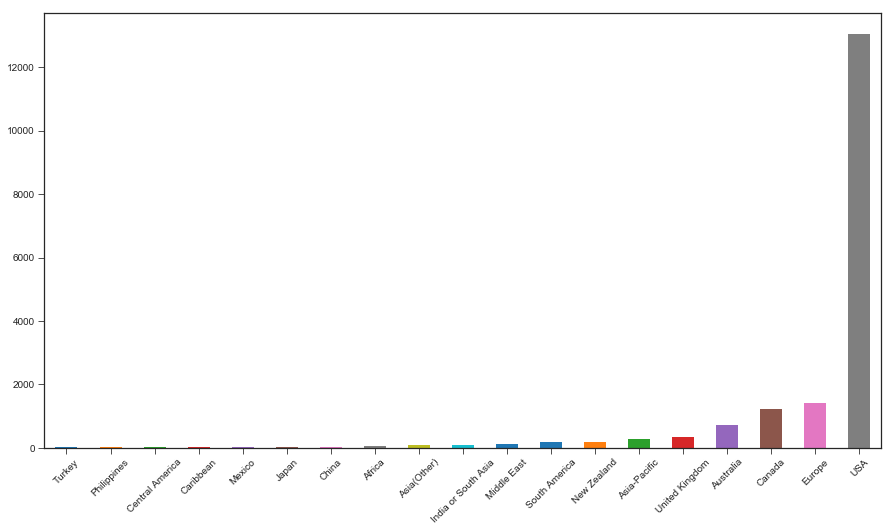

In [619]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (df['location'].value_counts())[df['location'].value_counts()>10].sort_values().plot(kind="bar",rot=45)

# U.S. Location

In [620]:
df['us location'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0       California    2571
1            Texas    1196
2         New York     864
3         Illinois     617
4    Massachusetts     513
5             Ohio     498
6     Pennsylvania     488
7          Florida     471
8       New Jersey     371
9       Washington     336
10        Virginia     313
11        Michigan     281
12  North Carolina     277
13         Georgia     276
14          Oregon     239
15       Minnesota     235
16            Utah     223
17        Maryland     223
18         Indiana     220
19         Arizona     214
20       Wisconsin     212
21        Colorado     209
22     Connecticut     140
23       Tennessee     138
24        Oklahoma     132
25        Kentucky     127
26        Missouri     126
27       Louisiana     119
28          Kansas      97
29            Iowa      89
30  South Carolina      85
31         Alabama      84
32          Nevada      81
33        Nebraska      72
34        Arkansas      56
35   New Hampshire      54
36           Idaho      45
37           Maine      43
38          Hawaii      43
39    Rhode Island      33
40   West Virginia      31
41     Mississippi      29
42      New Mexico      27
43         Montana      24
44        Delaware      23
45         Vermont      22
46    South Dakota      19
47         Wyoming      15
48    North Dakota      12
49          Alaska      12

### U.S. Location Plot

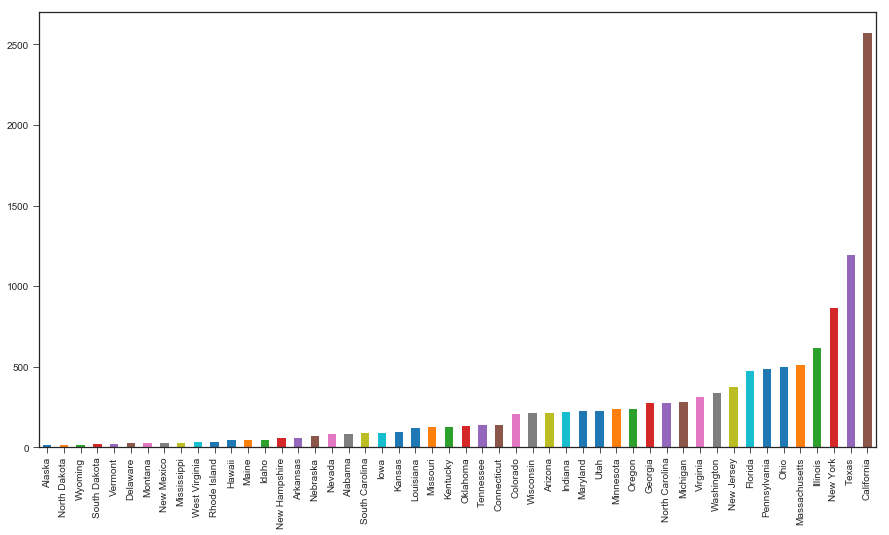

In [621]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['us location'].value_counts().sort_values().plot(kind="bar")

# Relationship status

In [622]:
df['relationship status'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             Single   10123
1  In a relationship    5196
2            Married    2223
3            Engaged     550
4            Widowed      51

### Relationship status plot

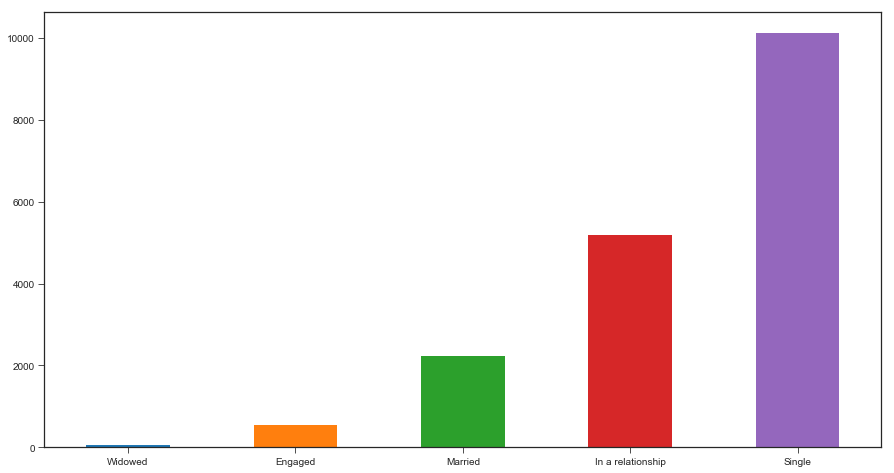

In [623]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['relationship status'].value_counts().sort_values().plot(kind="bar",rot=0)

# How long have you been a redditor?

In [624]:
df['years on reddit'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0         3 - 4 years    5707
1         5 - 6 years    4365
2         1 - 2 years    4052
3         7 - 8 years    1495
4       7 - 12 months     876
5        4 - 6 months     559
6  Less than 3 months     474
7         8 - 9 years     358
8          10 + years     256
9           7 + years       1

### Redditor Duration Plot

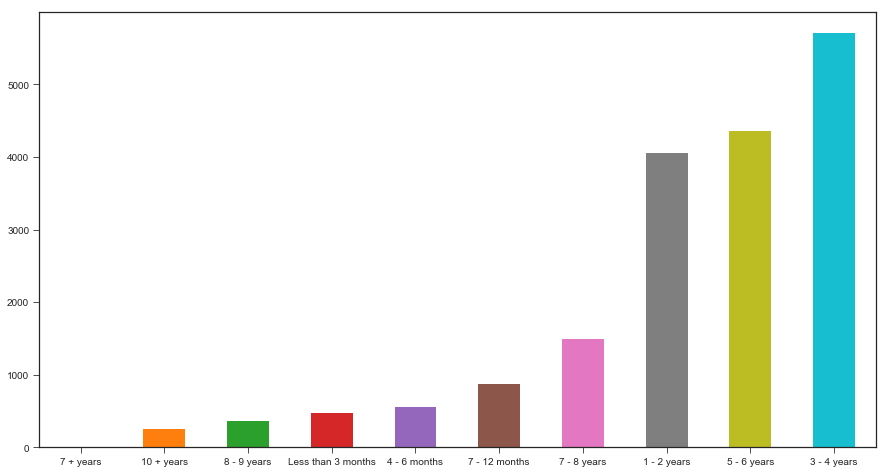

In [625]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['years on reddit'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you use more than one account on r/NBA?

In [626]:
df[
'multiple accounts'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0            No   17302
1           Yes     841

### Number of accounts plot

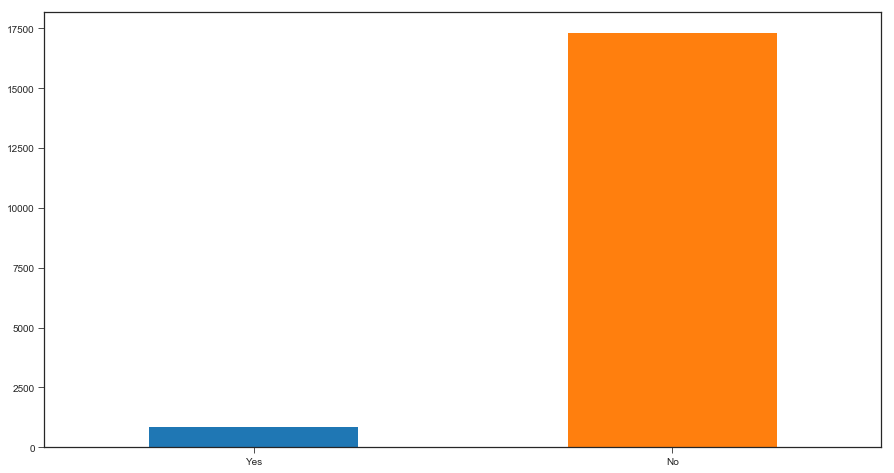

In [627]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['multiple accounts'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you have a local NBA team?

In [628]:
df['local NBA team'].value_counts().to_excel(writer, "localnbateam")
writer.save()
df['local NBA team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           Yes   10771
1            No    7372

### Local NBA Team Plot

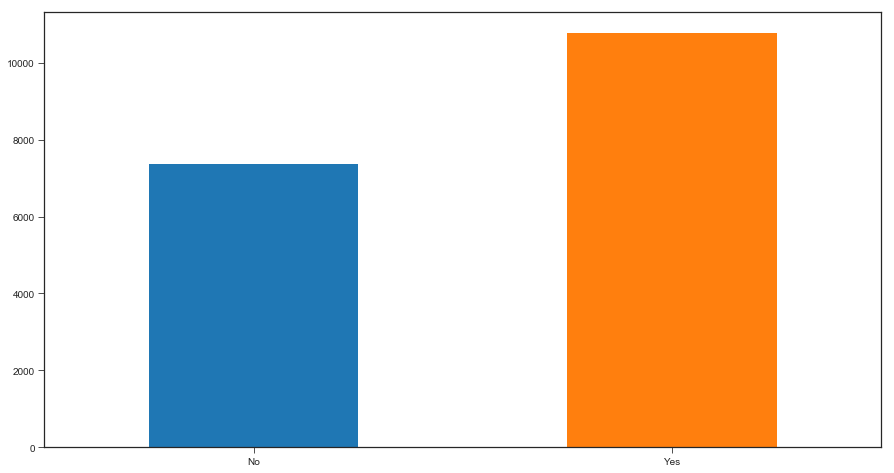

In [629]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['local NBA team'].value_counts().sort_values().plot(kind="bar",rot=0)

# What's your favorite sport?

In [630]:
df['favorite sport'].replace(['tennis','Tennis '],'Tennis',True)
df['favorite sport'].replace(['Mma'],'MMA',True)
df['favorite sport'].replace([
    'Australian Rules Football','Australian Football','Australian Rules Football ',
    'Australian football','Australian rules football'],'AFL',True)
df['favorite sport'].replace(['Rugby League','rugby', 'rugby league','Rugby '],'Rugby',True)
df['favorite sport'].replace(['cricket','Cricket '],'Cricket',True)
df['favorite sport'].replace(['Track & Field'],'Track and Field',True)
df['favorite sport'].replace(['Ultimate','Ultimate frisbee'],'Ultimate Frisbee',True)
df['favorite sport'].replace(['Water polo'],'Water Polo',True)
df['favorite sport'].replace(['volleyball','volleyball ','Volleyball '],'Volleyball',True)

favsport = df['favorite sport'].value_counts()
favsport = favsport[favsport>1]
favsport.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0          Basketball   12925
1            Football    2109
2              Soccer    1439
3            Baseball     635
4              Hockey     279
5               Rugby      73
6              Tennis      71
7                 AFL      47
8                 MMA      45
9          Volleyball      45
10            Cricket      44
11               Golf      39
12   Ultimate Frisbee      31
13           Lacrosse      11
14            Running      10
15          Formula 1      10
16            Curling      10
17           Swimming       9
18          Wrestling       8
19             Boxing       8
20    Track and Field       8
21          Badminton       8
22         Water Polo       7
23            Cycling       7
24           Handball       6
25             Rowing       5
26                 F1       4
27            Surfing       4
28          Floorball       3
29            Fencing       3
30        Rugby Union       3
31              Golf        3
32           lacrosse       3
33       Table Tennis       3
34             NASCAR       3
35              Chess       3
36             Skiing       3
37             Squash       3
38                mma       3
39                idk       2
40      Nordic Skiing       2
41           Climbing       2
42             boxing       2
43        Auto Racing       2
44                GAA       2
45             MotoGP       2
46       Aussie rules       2
47       Aussie Rules       2
48  Ultimate frisbee        2
49       Snowboarding       2
50        Motorsports       2
51              Track       2
52            Hurling       2
53               Sumo       2
54          Swimming        2
55               golf       2

### Favorite sport plot

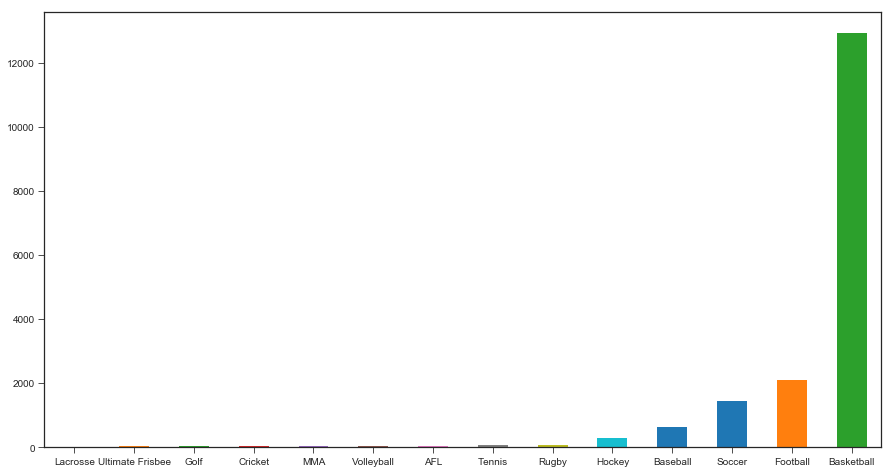

In [631]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (favsport)[favsport>10].sort_values().plot(kind="bar",rot=0)

# How many NBA games have you attended?

In [632]:
df['games attended'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0          None    5641
1         2 - 5    3338
2         1 - 2    3208
3        6 - 10    2472
4       11 - 20    1682
5       21 - 50    1137
6           50+     665

### NBA Games Attended Plot

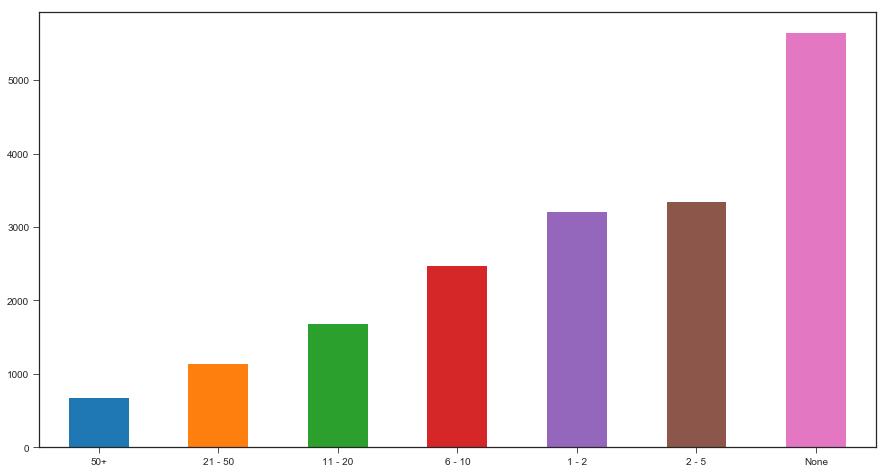

In [633]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['games attended'].value_counts().sort_values().plot(kind="bar",rot=0)

# Do you have a local NBA Team?

In [634]:
df['local NBA team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           Yes   10771
1            No    7372

### Local NBA Team plot

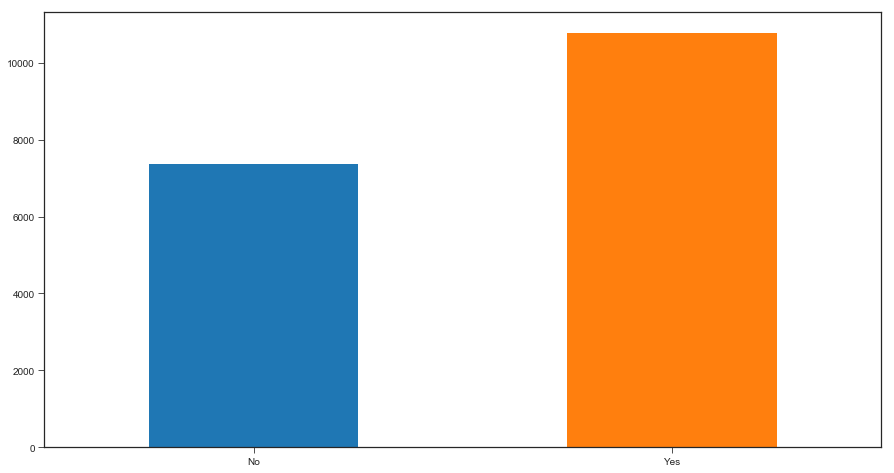

In [635]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['local NBA team'].value_counts().sort_values().plot(kind="bar",rot=0)

# How long have you regularly watched the NBA?

In [636]:
df['years watched NBA'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0             5 - 10 years    4334
1             10 -20 years    3865
2              3 - 5 years    2851
3              2 - 3 years    1992
4              1 - 2 years    1793
5                20+ years    1568
6  I don't watch regularly    1143
7         Less than 1 year     597

### Years watched NBA plot

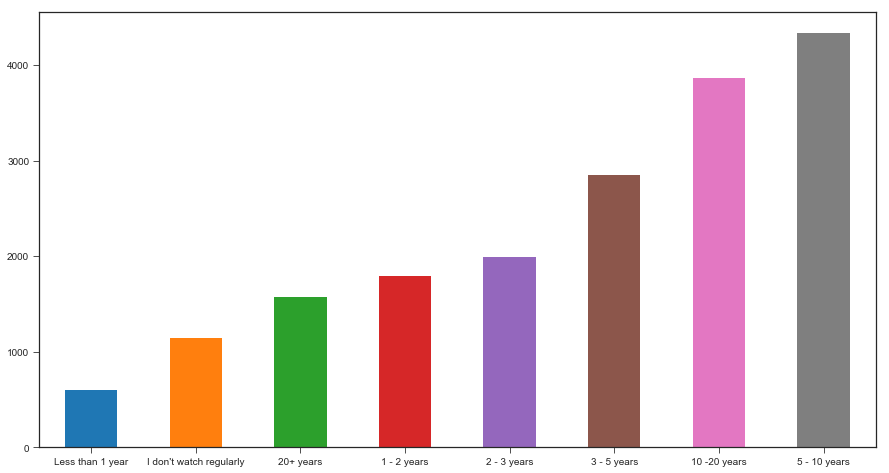

In [637]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['years watched NBA'].value_counts().sort_values().plot(kind="bar",rot=0)

# What's the highest level of basketball you've played

In [638]:
highestbasketball = df['highest level of basketball'].value_counts()
highestbasketball = highestbasketball[highestbasketball>2]
highestbasketball.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0          Pick-up/Rec games    6776
1           High School team    3544
2        Jr. High or earlier    2978
3       Organized Intramural    1914
4        I have never played    1596
5             AAU or similar     678
6            College (Other)     371
7  Professional (Any League)     116
8              College (D-1)      81

### Level of basketball plot

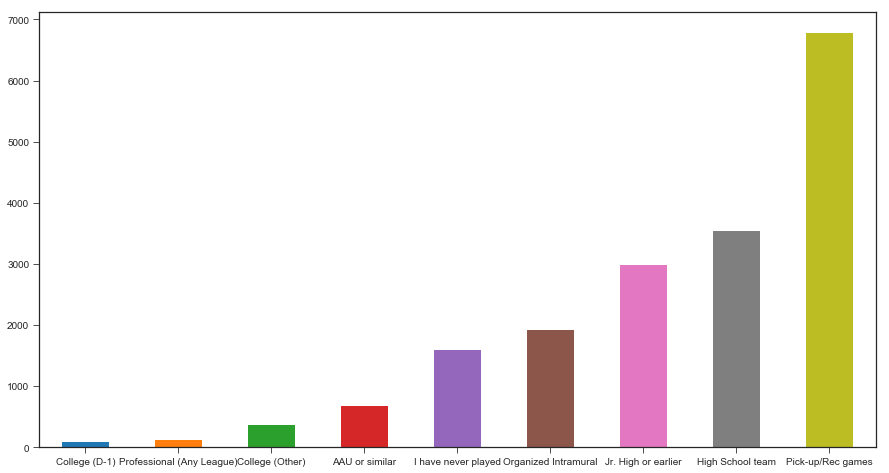

In [639]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = highestbasketball.sort_values().plot(kind="bar",rot=0)

# What's your MOST favorite NBA team?

In [640]:
df['most favorite team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0                LA Lakers    1658
1    Golden State Warriors    1623
2           Boston Celtics    1609
3      Cleveland Cavaliers    1222
4      Philadelphia Sixers    1057
5        San Antonio Spurs     980
6          Toronto Raptors     910
7            Chicago Bulls     757
8          New York Knicks     730
9          Houston Rockets     640
10        Dallas Mavericks     576
11   Oklahoma City Thunder     567
12  Minnesota Timberwolves     462
13  Portland Trail Blazers     454
14               Utah Jazz     436
15              Miami Heat     429
16         Milwaukee Bucks     400
17         Detroit Pistons     345
18            Phoenix Suns     302
19      Washington Wizards     298
20          Indiana Pacers     292
21          Denver Nuggets     259
22        Sacramento Kings     233
23    New Orleans Pelicans     219
24             LA Clippers     204
25           Atlanta Hawks     201
26       Charlotte Hornets     184
27           Brooklyn Nets     166
28           Orlando Magic     142
29       Memphis Grizzlies     124

### Most favorite NBA team plot

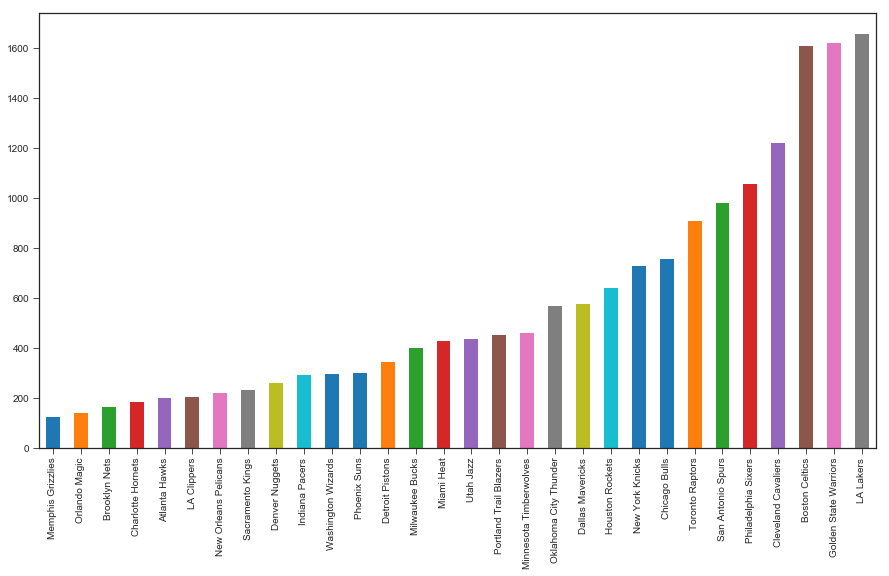

In [641]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['most favorite team'].value_counts().sort_values().plot(kind="bar")

# What's your LEAST favorite NBA Team?

In [642]:
df['least favorite team'].value_counts().rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0    Golden State Warriors    5226
1                LA Lakers    2422
2           Boston Celtics    2065
3      Cleveland Cavaliers    1521
4          Houston Rockets    1315
5    Oklahoma City Thunder     566
6      Philadelphia Sixers     354
7              LA Clippers     341
8          New York Knicks     327
9       Washington Wizards     247
10        Sacramento Kings     232
11       San Antonio Spurs     227
12           Orlando Magic     223
13              Miami Heat     212
14           Brooklyn Nets     177
15       Charlotte Hornets     158
16           Atlanta Hawks     125
17           Chicago Bulls     124
18       Memphis Grizzlies     122
19         Detroit Pistons     116
20         Toronto Raptors     111
21        Dallas Mavericks     106
22          Denver Nuggets      90
23               Utah Jazz      69
24            Phoenix Suns      59
25          Indiana Pacers      48
26  Portland Trail Blazers      42
27  Minnesota Timberwolves      33
28    New Orleans Pelicans      23
29         Milwaukee Bucks      16

### Lease favorite NBA team plot

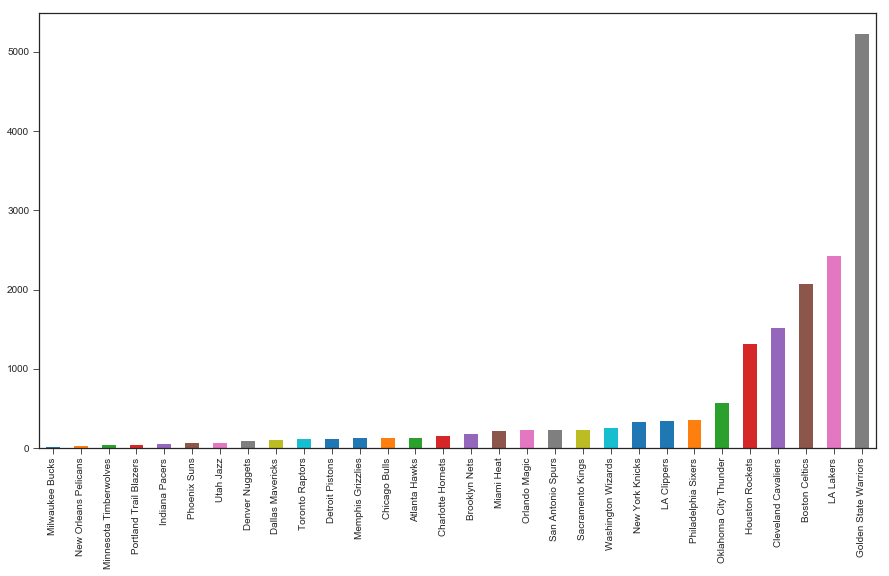

In [643]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = df['least favorite team'].value_counts().sort_values().plot(kind="bar")

# Favorite NBA Player

### Cleaning up the data some

In [667]:
favNBAPlayer = df['favorite NBA player'].str.strip()
favNBAPlayer.replace(['Lebron James', 'Lebron','LeBron','Lebron james','lebron','lebron james'], "LeBron James",True)
favNBAPlayer.replace(['Giannis'],'Giannis Antetokounmpo',True)
favNBAPlayer.replace(['Steph Curry','Curry','Steph curry','Steph'],'Stephen Curry',True)
favNBAPlayer.replace(['Dirk'],'Dirk Nowitzki',True)
favNBAPlayer.replace(['Kobe','kobe','Kobe bryant'],'Kobe Bryant',True)
favNBAPlayer.replace(['Westbrook','Russel Westbrook'],'Russell Westbrook',True)
favNBAPlayer.replace(['Porzingis'],'Kristaps Porzingis',True)
favNBAPlayer.replace(['Jokic'],'Nikola Jokic',True)
favNBAPlayer.replace(['Tatum'],'Jayson Tatum',True)
favNBAPlayer.replace(['Klay'],'Klay Thompson',True)
favNBAPlayer.replace(['Jordan'],'Michael Jordan',True)
favNBAPlayer.replace(['Embiid','Joel embiid'],'Joel Embiid',True)

### Fav NBA Player (minimum 50 votes)

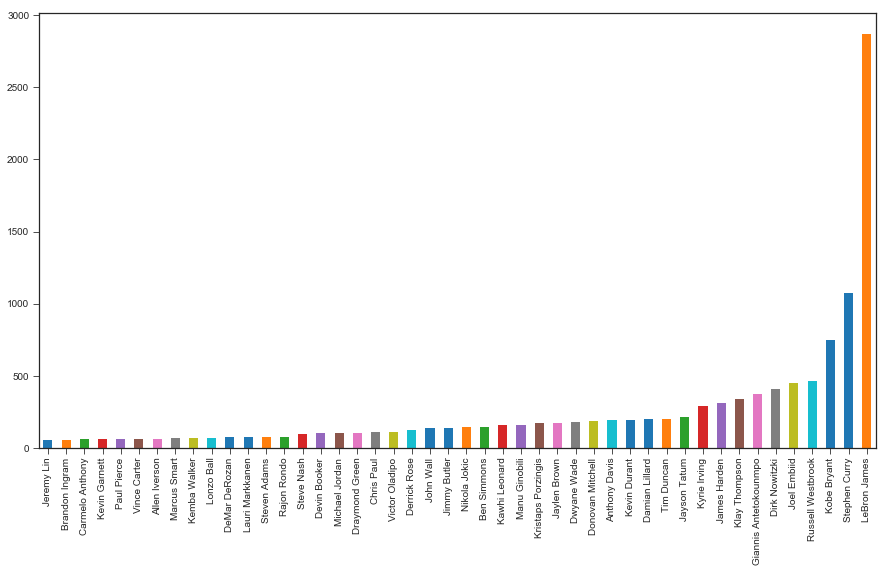

In [645]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = (favNBAPlayer.value_counts())[favNBAPlayer.value_counts()>50].sort_values().plot(kind="bar")

# Outside of /r/NBA where do you get your NBA news from most often?

In [647]:
socialmedia = df['other social media'].replace(['Nowhere','none','nowhere', 'Nowhere else', "No where else", "Reddit", "I don't", "I dont", "r/nba", "R/nba", "r/nba only","Nowhere.","No",'None really'],['None','None','None','None','None','None','None','None','None','None','None','None','None','None'])

socialmedia = socialmedia.str.upper()
socialmedia.replace(["THESCORE"],"THE SCORE",True)
socialmedia.replace(["NOWHERE", "I DON'T ","ONLY R/NBA"],"NONE",True)
socialmedia = socialmedia.replace(['Ringer'],['The Ringer'])
socialmedia = socialmedia.replace('YOUTUBE ','YOUTUBE')

## Replaced similar values

### Include only response frequency > 10

In [649]:
smcounts = socialmedia.value_counts()
smcounts = smcounts[smcounts>10]
smcounts.rename_axis('unique_values').reset_index(name='counts')

unique_values  counts
0           TWITTER    7170
1              ESPN    4955
2   BLEACHER REPORT    2848
3              NONE     382
4             YAHOO     312
5        THE RINGER     181
6         INSTAGRAM     180
7           YOUTUBE     161
8         THE SCORE     135
9          PODCASTS      95
10           GOOGLE      91
11         FACEBOOK      87
12          NBA.COM      60
13          FRIENDS      49
14           RINGER      38
15      GOOGLE NEWS      32
16          NBA APP      27
17         DEADSPIN      23
18        SB NATION      23
19         SBNATION      20
20           REALGM      20
21     THE ATHLETIC      19
22        ROTOWORLD      18
23        HOOPSHYPE      17
24            RADIO      15
25              TSN      12
26     THESCORE APP      11

### Outside of r/NBA where do you get your news from plot

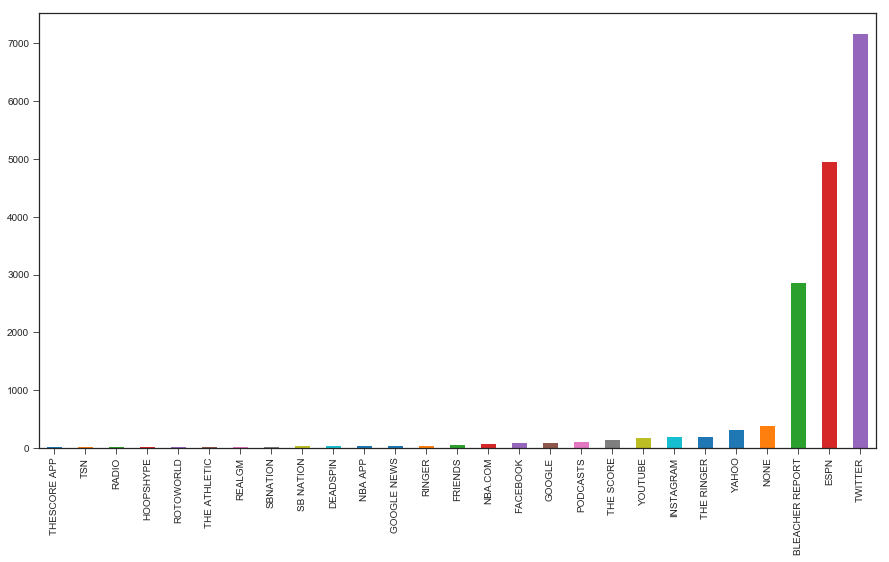

In [650]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = smcounts.sort_values().plot(kind="bar")

# Other social media of choice?

In [668]:
othersocialmedia = df['social media of choice']
othersocialmedia = othersocialmedia.str.upper()
othersocialmedia.replace(['REDDIT ',"REDDIT?"],"REDDIT",True)
othersocialmedia.replace(["NONE","NONE.","NOTHING","NO","NONE OF THE ABOVE","NONE ","NO SOCIAL MEDIA","I DON'T USE SOCIAL MEDIA","I DON'T USE SOCIAL MEDIA.","DON'T USE SOCIAL MEDIA"],"NONE",True)


In [652]:
socounts = othersocialmedia.value_counts()
socounts[socounts>10].rename_axis('unique_values').reset_index(name='counts')


unique_values  counts
0     INSTAGRAM    5060
1       TWITTER    4974
2      FACEBOOK    3684
3      SNAPCHAT    2479
4          NONE     900
5        REDDIT     543
6       YOUTUBE      37
7      LINKEDIN      12

### Other social media of choice plot

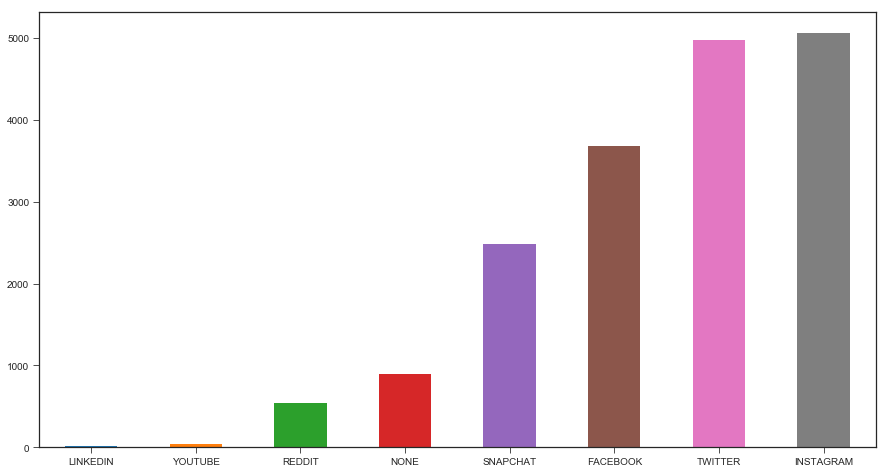

In [653]:
fig, ax = plt.subplots()
fig.set_size_inches([15,8])
plot = socounts[socounts>10].sort_values().plot(kind="bar",rot=0)

### Write data to excel for infogram.com

In [654]:
df['age'].value_counts().to_excel(writer, "age")
gender['gender'].value_counts().to_excel(writer, "gender")
df['education'].value_counts().to_excel(writer, "education")
ecounts.to_excel(writer, "ethnicity")
df['relationship status'].value_counts().to_excel(writer, "relationship")
df['sexual orientation'].value_counts().to_excel(writer, "sexualorientation")
df['location'].value_counts().to_excel(writer, "generallocation")
df['us location'].value_counts().to_excel(writer, "uslocation")
df['years on reddit'].value_counts().to_excel(writer, "redditorlength")
df['multiple accounts'].value_counts().to_excel(writer, "oneaccount")
favsport.value_counts().to_excel(writer, "favoritesport")
df['games attended'].value_counts().to_excel(writer, "nbagamesattended")
df['local NBA team'].value_counts().to_excel(writer,'localnbateam')
highestbasketball.value_counts().to_excel(writer,'howmuchbasketball')
df['years watched NBA'].value_counts().to_excel(writer,'howlongwatched')
df['most favorite team'].value_counts().to_excel(writer,'leastfavoriteteam')
df['least favorite team'].value_counts().to_excel(writer,'leastfavoriteteam')
favNBAPlayer.value_counts().to_excel(writer,'favorite NBA player')
smcounts.to_excel(writer,'other social media counts')
socounts.to_excel(writer,'social media of choice counts')
writer.save()

# Further data analysis

In [655]:
(gender.groupby('gender'))['age'].value_counts()

gender             age         
Female             26-30            129
                   22-25            108
                   18-21            101
                   31-35             47
                   17 and Under      34
                   Over 60           19
                   36-40             14
                   41-50             10
                   51-60              5
Genderfluid        18-21              1
                   Over 60            1
Male               22-25           5009
                   18-21           4604
                   26-30           3888
                   31-35           1511
                   17 and Under    1059
                   36-40            503
                   41-50            162
                   51-60             16
                   Over 60           13
Non-Binary         18-21              3
                   22-25              3
                   31-35              2
                   Over 60            1
Prefer n

In [656]:
(gender.groupby('gender'))['education'].value_counts()

gender             education                          
Female             Bachelor’s degree                       200
                   Some college credit, no degree           82
                   Master’s degree                          63
                   Doctorate degree                         33
                   Some high school, no diploma             33
                   High School Graduate                     32
                   Associate degree                         10
                   Professional degree                       8
                   Trade/technical/vocational training       6
Genderfluid        Doctorate degree                          1
                   Some college credit, no degree            1
Male               Bachelor’s degree                      6672
                   Some college credit, no degree         4199
                   Master’s degree                        1595
                   High School Graduate                   1543


In [657]:
(gender.groupby('gender'))['ethnicity'].value_counts()

gender             ethnicity                                                                
Female             White                                                                          205
                   Asian                                                                          107
                   Black                                                                           34
                   Mixed                                                                           29
                   Hispanic                                                                        28
                   Indian or South Asian                                                           22
                   Middle Eastern                                                                  14
                   Native American                                                                 13
                   Pacific Islander                                                        

In [658]:
(gender.groupby('gender'))['sexual orientation'].value_counts()

gender             sexual orientation
Female             Straight                332
                   Bisexual                 83
                   Gay                      41
                   Pansexual                 7
                   Asexual                   2
                   Queer                     2
Genderfluid        Bisexual                  1
                   Gay                       1
Male               Straight              16137
                   Bisexual                496
                   Gay                      92
                   Pansexual                16
                   Asexual                  12
                   Nephew                    5
                   Queer                     3
                   Biromantic asexual        1
                   Nephew                    1
                   None                      1
                   nephew                    1
Non-Binary         Bisexual                  3
                   Pan

In [659]:
(gender.groupby('gender'))['relationship status'].value_counts()

gender             relationship status
Female             Single                  250
                   In a relationship       117
                   Married                  60
                   Engaged                  20
                   Widowed                  20
Genderfluid        In a relationship         1
                   Widowed                   1
Male               Single                 9358
                   In a relationship      4840
                   Married                2040
                   Engaged                 510
                   Widowed                  17
Non-Binary         Single                    7
                   Engaged                   1
                   Married                   1
Prefer not to say  Single                   39
                   In a relationship        18
                   Widowed                  10
                   Married                   8
                   Engaged                   4
Transgender        Si

In [660]:
(gender.groupby('age'))['education'].value_counts()

age           education                          
17 and Under  Some high school, no diploma            926
              High School Graduate                    134
              Some college credit, no degree           22
              Doctorate degree                          8
              Bachelor’s degree                         3
              Trade/technical/vocational training       2
              Associate degree                          1
              Master’s degree                           1
              Professional degree                       1
18-21         Some college credit, no degree         2474
              High School Graduate                   1080
              Bachelor’s degree                       765
              Associate degree                        163
              Some high school, no diploma            154
              Master’s degree                          37
              Trade/technical/vocational training      35
              Doctorat

In [661]:
(gender.groupby('age'))['ethnicity'].value_counts()

age           ethnicity                                                                
17 and Under  White                                                                         605
              Asian                                                                         173
              Indian or South Asian                                                         100
              Hispanic                                                                       62
              Mixed                                                                          58
              Black                                                                          56
              Middle Eastern                                                                 29
              Pacific Islander                                                                5
              Native American                                                                 4
              Brazil                            

In [662]:
(gender.groupby('age'))['relationship status'].value_counts()

age           relationship status
17 and Under  Single                  957
              In a relationship       135
              Widowed                   5
              Married                   1
18-21         Single                 3512
              In a relationship      1178
              Engaged                  21
              Married                  12
              Widowed                   5
22-25         Single                 2958
              In a relationship      1837
              Married                 193
              Engaged                 139
              Widowed                   5
26-30         Single                 1611
              In a relationship      1391
              Married                 750
              Engaged                 277
              Widowed                   8
31-35         Married                 716
              Single                  445
              In a relationship       334
              Engaged                  77


In [663]:
(df.groupby('age'))['years on reddit'].value_counts()

age           years on reddit   
17 and Under  1 - 2 years            560
              3 - 4 years            203
              7 - 12 months          155
              4 - 6 months            97
              Less than 3 months      88
              5 - 6 years             38
              10 + years               5
              7 - 8 years              3
18-21         3 - 4 years           1781
              1 - 2 years           1482
              5 - 6 years            843
              7 - 12 months          325
              4 - 6 months           224
              Less than 3 months     181
              7 - 8 years             95
              8 - 9 years              9
              10 + years               4
22-25         3 - 4 years           1770
              5 - 6 years           1567
              1 - 2 years           1033
              7 - 8 years            450
              7 - 12 months          218
              4 - 6 months           132
              Less than 

In [664]:
(gender.groupby('age'))['years watched NBA'].value_counts()

age           years watched NBA      
17 and Under  1 - 2 years                 253
              2 - 3 years                 230
              3 - 5 years                 203
              5 - 10 years                164
              I don't watch regularly     105
              Less than 1 year            104
              10 -20 years                 36
              20+ years                     3
18-21         5 - 10 years               1160
              3 - 5 years                 942
              1 - 2 years                 801
              2 - 3 years                 787
              10 -20 years                461
              Less than 1 year            284
              I don't watch regularly     282
              20+ years                    11
22-25         5 - 10 years               1557
              10 -20 years               1233
              3 - 5 years                 902
              2 - 3 years                 547
              1 - 2 years                 

In [665]:
(df.groupby('us location'))['most favorite team'].value_counts()

us location     most favorite team    
Alabama         Boston Celtics             11
                Golden State Warriors       8
                Oklahoma City Thunder       7
                Dallas Mavericks            6
                Memphis Grizzlies           6
                Cleveland Cavaliers         5
                New Orleans Pelicans        5
                Atlanta Hawks               4
                Houston Rockets             3
                Miami Heat                  3
                Philadelphia Sixers         3
                San Antonio Spurs           3
                Utah Jazz                   2
                Brooklyn Nets               1
                Chicago Bulls               1
                Indiana Pacers              1
                LA Lakers                   1
                Milwaukee Bucks             1
                Minnesota Timberwolves      1
                New York Knicks             1
                Orlando Magic            

In [666]:
(df.groupby('us location'))['least favorite team'].value_counts()

us location     least favorite team   
Alabama         Golden State Warriors      29
                LA Lakers                  11
                Houston Rockets             7
                Boston Celtics              6
                Cleveland Cavaliers         4
                New York Knicks             4
                Oklahoma City Thunder       3
                Philadelphia Sixers         3
                LA Clippers                 2
                Miami Heat                  2
                Washington Wizards          2
                Brooklyn Nets               1
                Dallas Mavericks            1
                Detroit Pistons             1
                Memphis Grizzlies           1
                Milwaukee Bucks             1
                San Antonio Spurs           1
Alaska          Boston Celtics              3
                Golden State Warriors       2
                LA Lakers                   2
                Charlotte Hornets        